# Exploring Dandiset 000945: Neural Spiking Data in the Awake Rat Somatosensory Cortex Responding to Trials of Transcranial Focused Ultrasound Stimulation

**Disclaimer:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Use caution when interpreting the code or results.

This notebook provides an overview of Dandiset 000945, which contains neural spiking data in the awake rat somatosensory cortex responding to trials of transcranial focused ultrasound stimulation.

You can find this Dandiset on Neurosift: https://neurosift.app/dandiset/001176/000945

This notebook will cover the following:

1.  Loading the Dandiset using the DANDI API.
2.  Loading and visualizing trial data.
3.  Loading and visualizing spiking data.

## Required Packages

The following packages are required to run this notebook:

*   dandi
*   pynwb
*   h5py
*   remfile
*   matplotlib
*   numpy
*   seaborn

## Load the Dandiset

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000945")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 75 assets in the dataset
\nFirst 5 assets:
- sub-BH498/sub-BH498_ses-20240306T124227_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T200606_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T191833_ecephys.nwb
- sub-BH498/sub-BH498_ses-20230906T180913_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T204552_ecephys.nwb


## Load and Visualize Trial Data

In this section, we will load the trial data from the NWB file and visualize the distribution of trial durations.

We will be using the following NWB file located at `sub-BH497/sub-BH497_ses-20240310T143729_ecephys.nwb`, which can be accessed via URL: `https://api.dandiarchive.org/api/assets/a4e04662-e4cb-49f3-9076-41e04e833a11/download/`

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


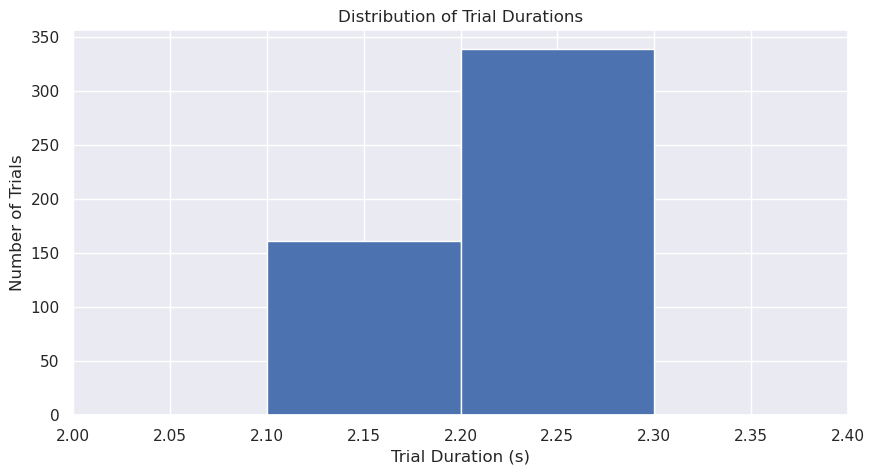

In [2]:
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/a4e04662-e4cb-49f3-9076-41e04e833a11/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, mode="r")
nwb = io.read()

# Get the trials data
trials = nwb.trials
start_time = trials.start_time[:]
stop_time = trials.stop_time[:]

# Calculate the duration of each trial
trial_duration = stop_time - start_time

# Plot the trial durations
plt.figure(figsize=(10, 5))
plt.hist(trial_duration, bins=[2.1, 2.2, 2.3])
plt.xlabel("Trial Duration (s)")
plt.ylabel("Number of Trials")
plt.title("Distribution of Trial Durations")
plt.xlim(2.0, 2.4)  # Set x-axis limits for better visualization.
plt.show()

The histogram shows the distribution of trial durations.
It shows that there are two distinct distributions.
Approximately, there are 160 trials with duration 2.10-2.20 seconds and 340 trials with duration 2.20-2.30 seconds amounting to 500 trials.

## Load and Visualize Spiking Data

In this section, we will load the spiking data from the NWB file and visualize the number of spikes per unit.

Unique cell types: [1. 2.]


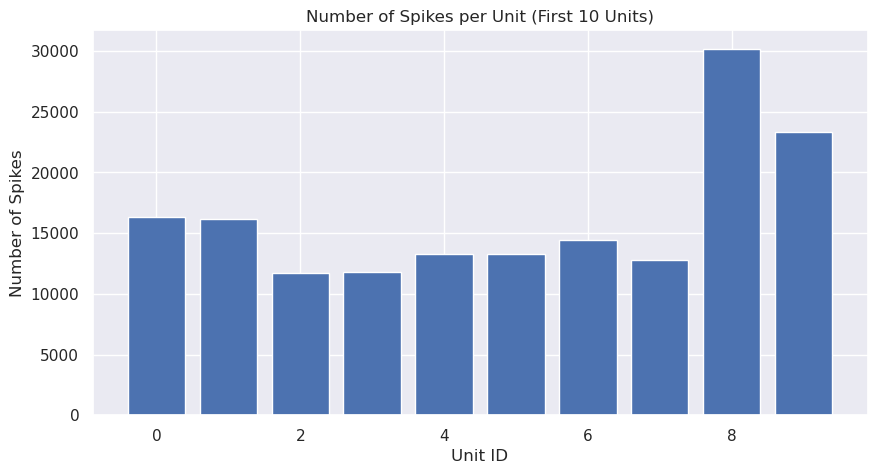

In [3]:
# Get the units data
units = nwb.units
spike_times = units.spike_times[:]
celltype_label = units.celltype_label[:]
unit_ids = units.id[:]

# Print the unique cell types
print("Unique cell types:", np.unique(celltype_label))

# Create a plot of the number of spikes for each unit
num_units_to_plot = 10
num_spikes = []
for i in range(num_units_to_plot):
    spike_times_for_unit = nwb.units['spike_times'][i]
    num_spikes.append(len(spike_times_for_unit))

unit_ids_to_plot = unit_ids[:num_units_to_plot]

plt.figure(figsize=(10, 5))
plt.bar(unit_ids_to_plot, num_spikes)
plt.xlabel("Unit ID")
plt.ylabel("Number of Spikes")
plt.title(f"Number of Spikes per Unit (First {num_units_to_plot} Units)")
plt.show()

The bar plot shows the distribution of spike counts for the first 10 units.
The approximate range of spike counts is from 11,000 to 30,000.

## Summary and Future Directions

This notebook provided a basic overview of how to load and visualize data from Dandiset 000945.

Future directions for analysis could include:

*   Further exploration of the spiking data, including spike sorting and analysis of firing rates.
*   Analysis of the relationship between ultrasound stimulation and neural activity.
*   Comparison of neural activity across different experimental conditions.